# Project: No-show appointments data Analysis 

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> No-show appointments dataset shows patients with all kind of records that either show or do not show in a full record.
Depending on this dataset I am going to try and figure out how does some columns (properties) help to predict whether a patient is not going to show up to their scheduled appointment or not?

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

In [2]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.

# loading the csv file 
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')

# showing first 10 rows
df.head(10)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No
5,9.598513e+13,5626772,F,2016-04-27T08:36:51Z,2016-04-29T00:00:00Z,76,REPÚBLICA,0,1,0,0,0,0,No
6,7.336882e+14,5630279,F,2016-04-27T15:05:12Z,2016-04-29T00:00:00Z,23,GOIABEIRAS,0,0,0,0,0,0,Yes
7,3.449833e+12,5630575,F,2016-04-27T15:39:58Z,2016-04-29T00:00:00Z,39,GOIABEIRAS,0,0,0,0,0,0,Yes
8,5.639473e+13,5638447,F,2016-04-29T08:02:16Z,2016-04-29T00:00:00Z,21,ANDORINHAS,0,0,0,0,0,0,No
9,7.812456e+13,5629123,F,2016-04-27T12:48:25Z,2016-04-29T00:00:00Z,19,CONQUISTA,0,0,0,0,0,0,No


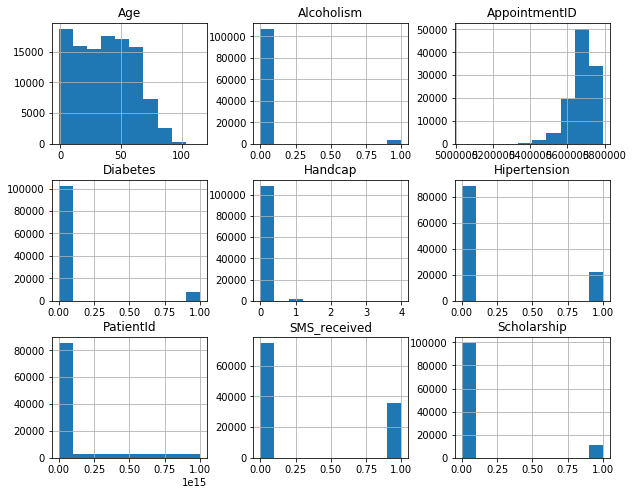

In [3]:
# hitogram for whole dataset
df.hist(figsize=(10, 8));

In [4]:
# show number of rows and columns
df.shape

(110527, 14)

In [5]:
print ("Rows: ", df.shape[0])
print ("Columns: ", df.shape[1])

Rows:  110527
Columns:  14


In [6]:
# show descriptive statistics of the dataset
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [7]:
# print information about the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


### Data Cleaning

In [8]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.

# remove duplicate rows
df.drop_duplicates(keep ='first', inplace=True)

# show number of rows and columns
df.shape

print ("Rows: ", df.shape[0])
print ("Columns: ", df.shape[1])

Rows:  110527
Columns:  14


In [9]:
#delete some columns
#df.drop([],  axis=1, inplace=True)
#df.columns

# Renaming columns to fix typos
df.rename(columns={'Handcap':'Handicap', 
                   'Hipertension':'Hypertension',
                   'No-show':'No_show'}, inplace=True)

df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [10]:
# show True if any column has null value, False otherwise
df.isnull().any()

PatientId         False
AppointmentID     False
Gender            False
ScheduledDay      False
AppointmentDay    False
Age               False
Neighbourhood     False
Scholarship       False
Hypertension      False
Diabetes          False
Alcoholism        False
Handicap          False
SMS_received      False
No_show           False
dtype: bool

In [11]:
# values for "Gender" and "No-show" need to be changed to bool before they can be used 
df.Gender = df.Gender.map({'M':1, 'F':0})
df.No_show = df.No_show.map({'Yes':1, 'No':0})

df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show
0,2.987250e+13,5642903,0,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,0
1,5.589978e+14,5642503,1,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,0
2,4.262962e+12,5642549,0,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,0
3,8.679512e+11,5642828,0,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,0
4,8.841186e+12,5642494,0,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,0


<a id='eda'></a>
## Exploratory Data Analysis


### How does age affect patient' showing or not showing for the appointment?

In [38]:
# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.

In [12]:
# variables of column No-show to use in drawing following histograms
show = df.No_show == 1
noShow = df.No_show == 0

In [13]:
# mean of Ages for patients who show
df.Age[show].mean()

34.317666562121957

In [14]:
# mean of Ages for patients who do not show
df.Age[noShow].mean()

37.790064393252315

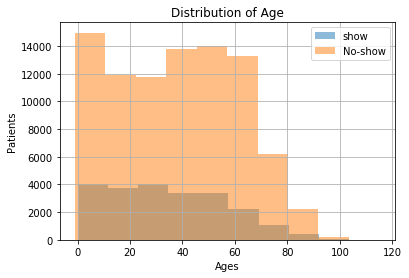

In [15]:
# 2 Distribution of Age for patients who show and not show
age_bar = df.Age[show].hist(alpha = 0.5, label='show');
age_bar = df.Age[noShow].hist(alpha = 0.5, label='No-show');
age_bar.set_xlabel("Ages")
age_bar.set_ylabel("Patients")
age_bar.set_title('Distribution of Age')
plt.legend();

Text(0.5,1,'Distribution of Age')

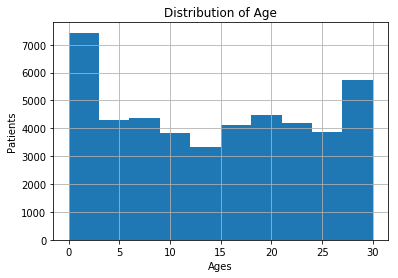

In [76]:
# Distribution of Age
age_bar = df_age.Age.hist(bins=10)
#age_bar = df.groupby('Age').No_show.mean().plot.bar()
age_bar.set_xlabel("Ages")
age_bar.set_ylabel("Patients")
age_bar.set_title('Distribution of Age')

### How does Gender affect patient' showing or not showing for the appointment?

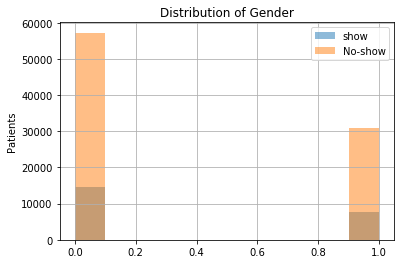

In [78]:
# 2 Distribution of Gender for patients who show and not show
gender_bar = df.Gender[show].hist(alpha = 0.5, label='show');
gender_bar = df.Gender[noShow].hist(alpha = 0.5, label='No-show');
#gender_bar.set_xticklabels(["Female", "Male"])
gender_bar.set_ylabel("Patients")
gender_bar.set_title('Distribution of Gender')
plt.legend()

Text(0.5,1,'Distribution of Gender')

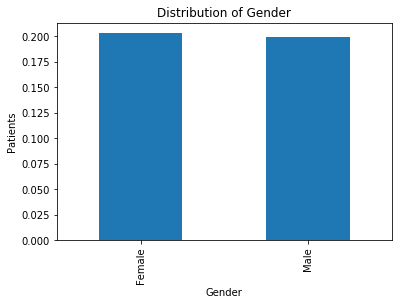

In [71]:
# Distribution of Gender 
gender_bar = df.groupby('Gender').No_show.mean().plot.bar()
gender_bar.set_xticklabels(["Female", "Male"])
gender_bar.set_ylabel("Patients")
gender_bar.set_title('Distribution of Gender')

### How does Diabetes affect patient' showing or not showing for the appointment?

In [67]:
# 0 = No Diabetes , 1 = Diabetes
df.Diabetes.value_counts()

0    102584
1      7943
Name: Diabetes, dtype: int64

Text(0.5,1,'Distribution of Diabetes')

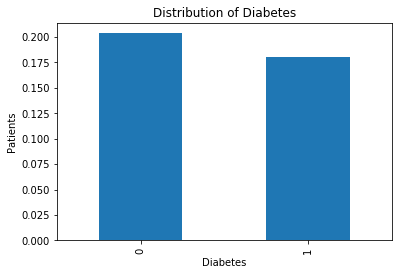

In [70]:
# Distribution of Diabetes 
diabetes_bar = df.groupby('Diabetes').No_show.mean().plot(kind='bar');
diabetes_bar.set_xlabel("Diabetes")
diabetes_bar.set_ylabel("Patients")
diabetes_bar.set_title('Distribution of Diabetes')

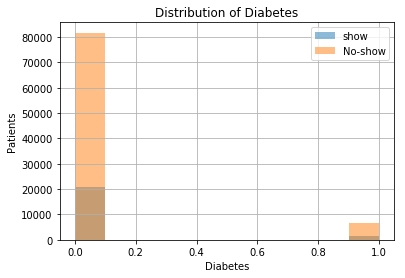

In [79]:
# 2 Distribution of Diabetes for patients who show and not show
diabetes_bar = df.Diabetes[show].hist(alpha = 0.5, label='show');
diabetes_bar = df.Diabetes[noShow].hist(alpha = 0.5, label='No-show');
diabetes_bar.set_xlabel("Diabetes")
diabetes_bar.set_ylabel("Patients")
diabetes_bar.set_title('Distribution of Diabetes')
plt.legend();

<a id='conclusions'></a>
## Conclusions

> For the above 3 properties:
 - Age: the age range that appears with most data is 0 - 90 years, for example the records for patients with ages 38-70 shows that those who show are less than those who do not.
 - Gender: female patients attend to not show more than male patients
 - Diabetes: patients who have Diabetes attend to not show more than the patient' who do not.

The 3 properties are not that intuitive (except for age), but basically there might be multiple features together that has affected the patient' not showing to the appointment in which all depend on what method used in the feature selection.

In [ ]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])